# Practical: Bulk Modulus
## Introdction
Bulk modulus is a measure of how resistant a material is to compression. It is defined as the ratio of the infinitesimal pressure increase to the resulting relative decrease of the volume.
$$K = -V \frac{dP}{dV}$$
Where $K$ is the bulk modulus, $V$ is the volume, $P$ is the pressure.

## Relationship Between Bulk Modulus and Density
Typically, the bulk modulus of a material is positively related to its density. This is because the bulk modulus is a measure of how resistant a material is to compression, and denser materials are generally more resistant to compression. For example, gases have low bulk moduli and low density because they are easily compressed, while solids have high bulk moduli with higher density because they are more difficult to compress.

## VRH, Reuss, and Hill Averages
There are different ways to measure the bulk modulus. The Voigt average assumes that the strain is uniform throughout the material, which tends to overestimate the bulk modulus. The Reuss average assumes that the stress is uniform throughout the material, which tends to underestimate the bulk modulus. The Hill average, being the arithmetic mean of the Voigt and Reuss averages, provides a more accurate estimate of the bulk modulus by balancing these two extremes.

The Voigt-Reuss-Hill (VRH) average is a method for calculating the bulk modulus of a composite material. The VRH average is the arithmetic mean of the Voigt and Reuss bounds, which are upper and lower bounds on the bulk modulus of a composite material. The Hill average is a weighted average of the Voigt and Reuss bounds, with the weights determined by the volume fractions of the phases in the composite material.

In Materials Project, the bulk modulus data is returned as a dictionary (`bulk_modulus`) with the following keys:
- "vrh": The VRH average of the bulk modulus.
- "reuss": The Reuss average of the bulk modulus.
- "voigt": The Voigt average of the bulk modulus.



In [ ]:
MP_API_KEY = "YOUR_API_KEY"

from mp_api.client import MPRester

# Pass your API key directly as an argument.
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        fields=["material_id", "volume","density", "bulk_modulus"], is_stable=True,
    )

Retrieving SummaryDoc documents:   0%|          | 0/34037 [00:00<?, ?it/s]

In [3]:
# dump results to a json file
import json
with open('materials_data.json', 'w') as f:
    json.dump([doc.dict() for doc in docs], f, indent=4)

We can then load the saved data and construct a `DataFrame` for easier manipulation.

In [4]:
import pandas as pd

# load results from a json file as pandas dataframe
with open('materials_data.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]


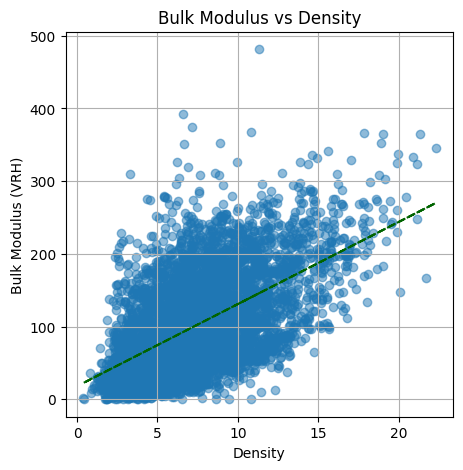

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Extract 'vrh' values from 'bulk_modulus' dictionaries
df['bulk_modulus_vrh'] = df['bulk_modulus'].apply(lambda x: x['vrh'] if isinstance(x, dict) else None)

# Plot bulk modulus vs density
plt.figure(figsize=(5, 5))
# plt.scatter(df['density'], df['bulk_modulus_vrh'], alpha=0.5)
plt.title('Bulk Modulus vs Density')
plt.xlabel('Density')
plt.ylabel('Bulk Modulus (VRH)')
plt.grid(True)
# Filter data to show only bulk modulus values between 0 and 500 GPa
filtered_df = df[(df['bulk_modulus_vrh'] >= 0) & (df['bulk_modulus_vrh'] <= 500)]
# Fit linear trend line
slope, intercept = np.polyfit(filtered_df['density'], filtered_df['bulk_modulus_vrh'], 1)
# Plot trend line
plt.plot(filtered_df['density'], slope * filtered_df['density'] + intercept, color='darkgreen', linestyle='--')
# Plot filtered data
plt.scatter(filtered_df['density'], filtered_df['bulk_modulus_vrh'], alpha=0.5)
plt.show()


In [ ]:
!pip install seaborn

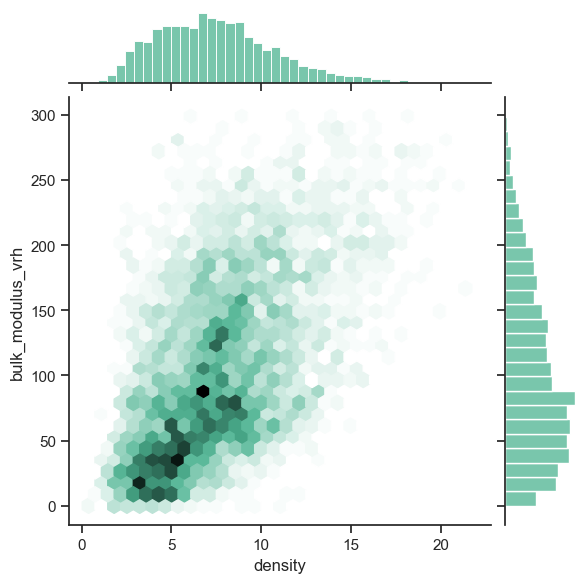

In [70]:
import seaborn as sns

# visualize above code using joint hexbin plot from seaborn
# Create a joint hexbin plot
sns.set_theme(style="ticks")

sns.jointplot(x='density', y='bulk_modulus_vrh', data=df[(df['bulk_modulus_vrh'] >= 0) & (df['bulk_modulus_vrh'] <= 300)], kind='hex', gridsize=30, color="#4CB391")

plt.show()

## Bulk Modulus of Oxides and Sulfides



In [26]:
with MPRester(MP_API_KEY) as mpr:
    docs_oxide = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "O"]
    )

with MPRester(MP_API_KEY) as mpr:
    docs_sulfide = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "S"]
    )

with open('materials_data_oxides.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_oxide], f, indent=4)

with open('materials_data_sulfides.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_sulfide], f, indent=4)

Retrieving SummaryDoc documents:   0%|          | 0/10348 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2865 [00:00<?, ?it/s]

In [27]:
# load results from a json file as pandas dataframe and then plot the data with two different colors
with open('materials_data_oxides.json', 'r') as f:
    data = json.load(f)

df_O = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]

with open('materials_data_sulfides.json', 'r') as f:
    data = json.load(f)

df_S = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]


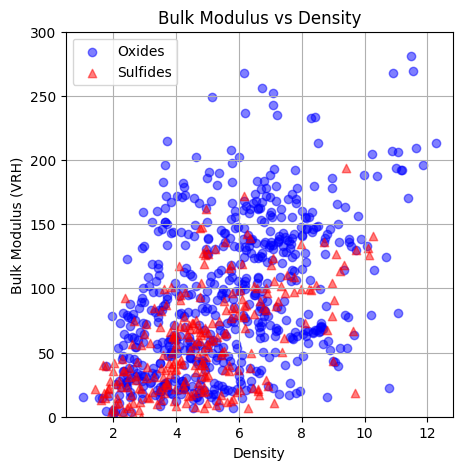

In [60]:
import numpy as np

#  plot the data with two different colors
# Extract 'vrh' values from 'bulk_modulus' dictionaries for oxides and sulfides
df_O['bulk_modulus_vrh'] = df_O['bulk_modulus'].apply(lambda x: x['vrh'] if isinstance(x, dict) else None)
df_S['bulk_modulus_vrh'] = df_S['bulk_modulus'].apply(lambda x: x['vrh'] if isinstance(x, dict) else None)

# Plot bulk modulus vs density for oxides and sulfides
plt.figure(figsize=(5, 5))

# Fit linear trend lines
slope_O, intercept_O = np.polyfit(df_O['density'], df_O['bulk_modulus_vrh'], 1)
slope_S, intercept_S = np.polyfit(df_S['density'], df_S['bulk_modulus_vrh'], 1)

# Plot trend lines
x = np.linspace(0, 10, 100)

plt.scatter(df_O['density'], df_O['bulk_modulus_vrh'], color='blue', label='Oxides', alpha=0.5)
plt.scatter(df_S['density'], df_S['bulk_modulus_vrh'], color='red', label='Sulfides',marker='^', alpha=0.5)
plt.plot(x, slope_O * x + intercept_O, color='darkblue', linestyle='-', linewidth=2)
plt.plot(x, slope_S * x + intercept_S, color='darkred',linestyle='-', linewidth=2)
plt.title('Bulk Modulus vs Density')
plt.xlabel('Density')
plt.ylabel('Bulk Modulus (VRH)')
plt.legend()
plt.grid(True)
plt.ylim(0, 300)

plt.show()
